## AG Demo 
## Preprocessing Data Input Tables Aggregated Area RShiny Demo App
Notes:
- asdf

In [1]:
# working with data
import os
import numpy as np
import pandas as pd
import geopandas as gpd # the library that lets us read in shapefiles
import geoplot as gplt # for plotting maps

# visulizaiton
import seaborn as sns
import matplotlib.pyplot as plt

# Cleanup
from datetime import datetime
pd.set_option('display.max_columns', 999)  # How to display all columns of a Pandas DataFrame in Jupyter Notebook

In [2]:
# Working Directory and Input File
workingDir = "C:/Users/rjame/Documents/WSWC Documents/WaDE Side Projects Local/20221024 Rshiny AG Demo/AG Demo/NotEssentialData"
os.chdir(workingDir)

## Inputs

In [3]:
#ReportingUnit Input
fileInput = "ReportingUnit.csv"
dfru = pd.read_csv(fileInput)
print(len(dfru))
dfru.head(1)

17595


,ReportingUnitUUID,ReportingUnitName,ReportingUnitNativeID,ReportingUnitTypeCV,WaDENameRU,WaDENameWS,VariableCV,WaDENameV,VariableSpecificCV,TimeStep,WaDENameBU,HasRecords
0,AZag_RU1,PHOENIX AMA,WaDEAZ_RU1,Active Management Area,Custom - Medium,Groundwater,Supply,Supply,Supply_Annual_Agricultural_Groundwater,Annual,Agriculture Irrigation,Yes


## Clean Reporting Unit Data

In [4]:
# Clean input
dfru = dfru.drop_duplicates().reset_index(drop=True) # Drop Duplicate Rows
dfru = dfru.replace(np.nan, "")  # Replaces NaN values with blank.
print(len(dfru))
dfru.head(1)

17595


,ReportingUnitUUID,ReportingUnitName,ReportingUnitNativeID,ReportingUnitTypeCV,WaDENameRU,WaDENameWS,VariableCV,WaDENameV,VariableSpecificCV,TimeStep,WaDENameBU,HasRecords
0,AZag_RU1,PHOENIX AMA,WaDEAZ_RU1,Active Management Area,Custom - Medium,Groundwater,Supply,Supply,Supply_Annual_Agricultural_Groundwater,Annual,Agriculture Irrigation,Yes


In [5]:
# add State field

def createState(Val):
    Val = Val.strip()
    outString = Val[:2]
    return outString

dfru['State'] = dfru.apply(lambda row: createState(row['ReportingUnitUUID']), axis=1)
for x in dfru['State'].sort_values().unique():
    print(f'"' + x + '",')

"AZ",
"CA",
"CO",
"NE",
"NM",
"NV",
"TX",
"UT",
"WY",


In [6]:
# polygon Color

colorDictionary = {
    "County" : "#648FFF", 
    "HUC8" : "#785EF0",
    "Custom - Small" : "#DC267F",
    "Custom - Medium" : "#FE6100",
    "Custom - Large" : "#FFB000"}

def polygonColorFunc(Val):
    Val = Val.strip()
    try:
        outString = colorDictionary[Val]
    except:
        outString = "???"
    return outString

dfru['polyColor'] = dfru.apply(lambda row: polygonColorFunc(row['WaDENameRU']), axis=1)
for x in dfru['polyColor'].sort_values().unique():
    print(f'"' + x + '",')

"#648FFF",
"#785EF0",
"#DC267F",
"#FE6100",
"#FFB000",


In [7]:
# Fixing blank WaDENameWS
def updateWaDENameWS(Val):
    Val = str(Val).strip()
    if Val == "" or pd.isnull(Val) or Val == "":
        outString = "Unspecified"
    else:
        outString = Val
    return outString

dfru['WaDENameWS'] = dfru.apply(lambda row: updateWaDENameWS(row['WaDENameWS']), axis=1)
for x in dfru['WaDENameWS'].sort_values().unique():
    print(f'"' + x + '",')

"Groundwater",
"Reuse",
"Surface Water",
"Surface and Groundwater",
"Unspecified",


In [8]:
# Fixing blank WaDENameBU
def updateWaDENameBU(Val):
    Val = str(Val).strip()
    if Val == "" or pd.isnull(Val) or Val == "":
        outString = "Unspecified"
    else:
        outString = Val
    return outString

dfru['WaDENameBU'] = dfru.apply(lambda row: updateWaDENameBU(row['WaDENameBU']), axis=1)
for x in dfru['WaDENameBU'].sort_values().unique():
    print(f'"' + x + '",')

"Agriculture Irrigation",
"Commercial/Industrial",
"Domestic",
"In-stream Flow",
"Livestock",
"Mining",
"Municipal Irrigation",
"Other",
"Public Supply",
"Recreation",
"Unspecified",


In [9]:
# Fixing blank WaDENameV
def updateWaDENameV(Val):
    Val = str(Val).strip()
    if Val == "" or pd.isnull(Val) or Val == "":
        outString = "Unspecified"
    else:
        outString = Val
    return outString

dfru['WaDENameV'] = dfru.apply(lambda row: updateWaDENameV(row['WaDENameV']), axis=1)
for x in dfru['WaDENameV'].sort_values().unique():
    print(f'"' + x + '",')

"Consumptive Use",
"Delivered",
"Demand",
"Supply",
"Withdrawal",


In [10]:
for x in dfru['TimeStep'].sort_values().unique():
    print(f'"' + x + '",')

"Annual",


In [11]:
for x in dfru['WaDENameRU'].sort_values().unique():
    print(f'"' + x + '",')

"County",
"Custom - Large",
"Custom - Medium",
"Custom - Small",
"HUC8",


In [12]:
# Groupby ReportingUnitUUID
dfru2 = dfru.groupby(['ReportingUnitUUID']).agg(lambda x: ", ".join([str(elem) for elem in (list(set(x))) if elem!=""])).replace(np.nan, "").reset_index()
print(len(dfru2))
dfru2.head(1)

1475


,ReportingUnitUUID,ReportingUnitName,ReportingUnitNativeID,ReportingUnitTypeCV,WaDENameRU,WaDENameWS,VariableCV,WaDENameV,VariableSpecificCV,TimeStep,WaDENameBU,HasRecords,State,polyColor
0,AZag_RU1,PHOENIX AMA,WaDEAZ_RU1,Active Management Area,Custom - Medium,"Reuse, Surface Water, Groundwater, Unspecified","Supply, Demand","Supply, Demand","Supply_Annual_Industrial_Effluent, Supply_Annu...",Annual,"Agriculture Irrigation, Commercial/Industrial,...",Yes,AZ,#FE6100


In [13]:
# count num of VariableSpecificCV after groupby

def countNumVar(Val):
    Val = list(Val.split(","))
    if Val == [""]:
        ValLen = 0
    else:
        ValLen = len(Val)
    return ValLen

dfru2['CountVar'] = dfru2.apply(lambda row: countNumVar(row['VariableSpecificCV']), axis=1)
dfru2['CountVar'].unique()

array([20, 19, 12, 10, 18,  3,  2,  7, 14,  5,  8,  9], dtype=int64)

In [14]:
# attach timeframe based on ReportingUnitUUID

fileInput = "start_end_ReportingUnits.csv"
dfrutf = pd.read_csv(fileInput)
dfru2 = pd.merge(dfru2, dfrutf, on='ReportingUnitUUID', how='left')
print(len(dfru2))
dfru2.head(1)

1475


,ReportingUnitUUID,ReportingUnitName,ReportingUnitNativeID,ReportingUnitTypeCV,WaDENameRU,WaDENameWS,VariableCV,WaDENameV,VariableSpecificCV,TimeStep,WaDENameBU,HasRecords,State,polyColor,CountVar,minTimeFrameStart,maxTimeFrameEnd
0,AZag_RU1,PHOENIX AMA,WaDEAZ_RU1,Active Management Area,Custom - Medium,"Reuse, Surface Water, Groundwater, Unspecified","Supply, Demand","Supply, Demand","Supply_Annual_Industrial_Effluent, Supply_Annu...",Annual,"Agriculture Irrigation, Commercial/Industrial,...",Yes,AZ,#FE6100,20,1985-01-01,2018-12-31


In [15]:
# Issue of ESRI Shapefile does not support datetime fields
print(pd.to_datetime(dfru2['minTimeFrameStart'], errors = 'coerce').min())
print(pd.to_datetime(dfru2['maxTimeFrameEnd'], errors = 'coerce').max())

1985-01-01 00:00:00
2022-11-30 00:00:00


In [16]:
# attach geometry based on ReportingUnitUUID
fileInput = "RU_Geometry.csv"
dfg = pd.read_csv(fileInput)
dfru2 = pd.merge(dfru2, dfg, on='ReportingUnitUUID', how='left')
print(len(dfru2))
dfru2.head(1)

1475


,ReportingUnitUUID,ReportingUnitName,ReportingUnitNativeID,ReportingUnitTypeCV,WaDENameRU,WaDENameWS,VariableCV,WaDENameV,VariableSpecificCV,TimeStep,WaDENameBU,HasRecords,State,polyColor,CountVar,minTimeFrameStart,maxTimeFrameEnd,geometry
0,AZag_RU1,PHOENIX AMA,WaDEAZ_RU1,Active Management Area,Custom - Medium,"Reuse, Surface Water, Groundwater, Unspecified","Supply, Demand","Supply, Demand","Supply_Annual_Industrial_Effluent, Supply_Annu...",Annual,"Agriculture Irrigation, Commercial/Industrial,...",Yes,AZ,#FE6100,20,1985-01-01,2018-12-31,POLYGON ((-112.06643638934614 34.0000552467006...


In [17]:
# drop empty geometry rows
dfru2 = dfru2.dropna()
print(len(dfru2))
dfru2.head(1)

1468


,ReportingUnitUUID,ReportingUnitName,ReportingUnitNativeID,ReportingUnitTypeCV,WaDENameRU,WaDENameWS,VariableCV,WaDENameV,VariableSpecificCV,TimeStep,WaDENameBU,HasRecords,State,polyColor,CountVar,minTimeFrameStart,maxTimeFrameEnd,geometry
0,AZag_RU1,PHOENIX AMA,WaDEAZ_RU1,Active Management Area,Custom - Medium,"Reuse, Surface Water, Groundwater, Unspecified","Supply, Demand","Supply, Demand","Supply_Annual_Industrial_Effluent, Supply_Annu...",Annual,"Agriculture Irrigation, Commercial/Industrial,...",Yes,AZ,#FE6100,20,1985-01-01,2018-12-31,POLYGON ((-112.06643638934614 34.0000552467006...


In [18]:
# convert from object string -to- geometry
dfru2['geometry'] = gpd.GeoSeries.from_wkt(dfru2['geometry'], crs="EPSG:4326") 

In [19]:
# Exporting output files.
# dfru2.to_excel('ReportingUnit_v2.xlsx', index=False)
gdfru2 = gpd.GeoDataFrame(dfru2, geometry=dfru2['geometry'], crs="EPSG:4326") # covert to geodataframe
gdfru2['geometry'] = gdfru2.simplify(0.001) # simplify the geometry. Lower the number the larger the exported file.
gdfru2.to_file("ReportingUnit_v2.shp") # export shape file

C:\Users\rjame\anaconda3\lib\site-packages\geopandas\io\file.py:299: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,
C:\Users\rjame\AppData\Local\Temp\ipykernel_21324\1195357969.py:5: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdfru2.to_file("ReportingUnit_v2.shp") # export shape file


## Mapping to Validate Sites
- having a little issue getting geoplot to work with geopandas on geometry data

C:\Users\rjame\anaconda3\lib\site-packages\geoplot\geoplot.py:885: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for subgeom in geom:


<AxesSubplot:>

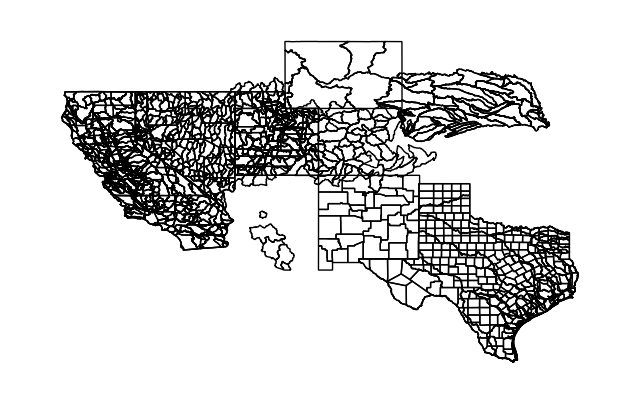

In [20]:
# map the polygons
gplt.polyplot(gdfru2)

In [21]:
# #checking geometry by state
# dftemp = dfru2.copy()
# dftemp = dftemp[dftemp['State']=='UT'].reset_index(drop=True) # change state entry here
# dftemp['geometry'] = gpd.GeoSeries.from_wkt(dftemp['geometry'], crs="EPSG:4326")
# gdftemp = gpd.GeoDataFrame(dftemp, geometry=dftemp['geometry'], crs="EPSG:4326")
# gplt.polyplot(gdftemp)

In [22]:
# # which areas are coming back with a null?
# dfru3 = dfru2.loc[pd.isnull(dfru2).any(1),:]
# print(len(dfru3))
# dfru3

In [23]:
# dfne = gdfru2.copy()
# dfne = dfne[dfne['State'] == "NE"]
# dfne.head(1)

In [24]:
# dfwy = gdfru2.copy()
# dfwy = dfwy[dfwy['State'] == "WY"]
# dfwy.head(1)

In [25]:
# dfnm = gdfru2.copy()
# dfnm = dfnm[dfnm['State'] == "NM"]
# dfnm.head(1)
# gplt.polyplot(dfnm)

In [26]:
# dfnv = gdfru2.copy()
# dfnv = dfnv[dfnv['State'] == "NV"]
# dfnv.head(1)
# #gplt.polyplot(dfnm)

In [27]:
#dfru2.to_excel('temp_reviewData.xlsx', index=False)  # The output

In [28]:
# gdfCO = gdfru2.copy()
# gdfCO = gdfCO[gdfCO['State'] == "CO"]
# gplt.polyplot(gdfCO)